In [3]:
import qiskit
qiskit.__version__
from qiskit import *

from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

import numpy as np
from math import pi


Question 1

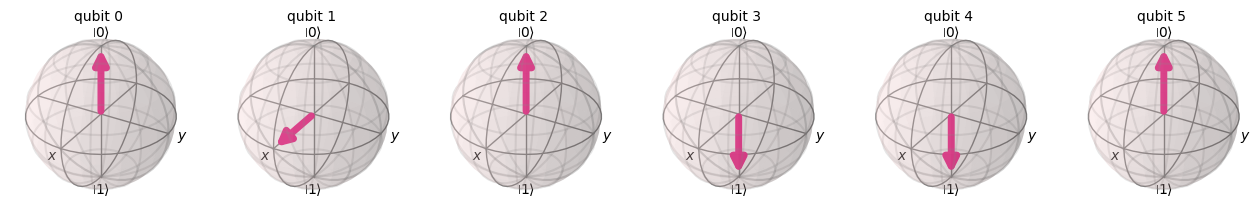

In [10]:
from qiskit import QuantumRegister

backend = AerSimulator()

#Part A
q = QuantumRegister(5)
c = QuantumRegister(1)
qc = QuantumCircuit(q, c)

qc.x(4)
qc.y(3)
qc.z(2)
qc.h(1)
qc.s(0)

qc.save_statevector(label='PostGate')
result = backend.run(qc).result()


plot_bloch_multivector(result.data(0)['PostGate'])

Part B

X-Axis Rotation: ([cos(theta/2), -i*sin(theta/2)],[-i sin(theta/2), cos(theta/2)])
Y-Axis Rotation: ([cos(theta/2), -sin(theta/2)],[sin(theta/2), cos(theta/2)])
Z-Axis Rotation: ([e^(-i*theta/2), 0],[0, e^(i*theta/2)])

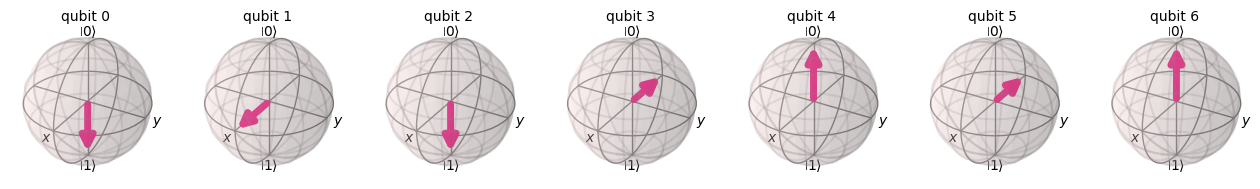

In [12]:
#Part B
q = QuantumRegister(6)
c = QuantumRegister(1)
qc = QuantumCircuit(q, c)

qc.h(1)
qc.h(3)
qc.h(5)

qc.rx(theta=np.pi,qubit=0)
qc.rx(theta=np.pi,qubit=1)
qc.ry(theta=np.pi,qubit=2)
qc.ry(theta=np.pi,qubit=3)
qc.rz(phi = np.pi,qubit=4)
qc.rz(phi=np.pi,qubit=5)

qc.save_statevector(label='PostGate')
result = backend.run(qc).result()


plot_bloch_multivector(result.data(0)['PostGate'])

Part C
(i) Z*H|0>
(ii) XYX|0>

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


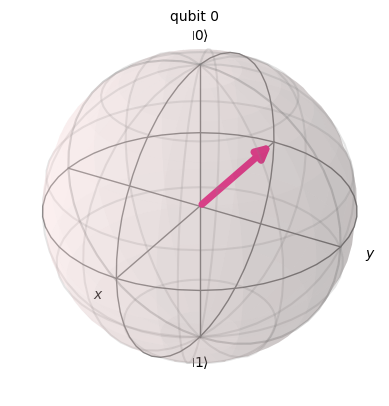

In [16]:
#Part D
# i
q = QuantumRegister(1)

qc = QuantumCircuit(q)

qc.h(0)
qc.z(0)

qc.save_statevector(label='PostGate')
result = backend.run(qc).result()
print(result.data(0)['PostGate'])

plot_bloch_multivector(result.data(0)['PostGate'])

Statevector([0.+0.j, 0.-1.j],
            dims=(2,))


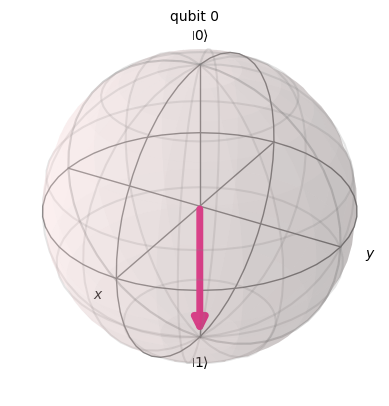

In [17]:
#ii

q = QuantumRegister(1)

qc = QuantumCircuit(q)

qc.x(0)
qc.y(0)
qc.x(0)

qc.save_statevector(label='PostGate')
result = backend.run(qc).result()
print(result.data(0)['PostGate'])

plot_bloch_multivector(result.data(0)['PostGate'])

In [ ]:
#Problem 2

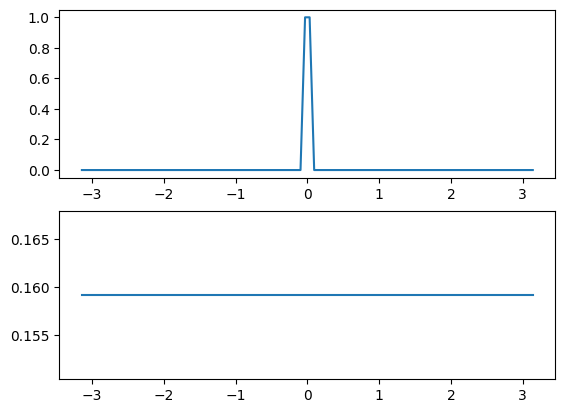

In [56]:
omega_0 = 2*np.pi * 5
sigma_t = 1

def dirac_delta(x, delta = 0):
    y = []
    for ele in x:
        if abs(ele) < 0.04:
            y.append(1.0)
        else:
            y.append(0.0)
    return y

t = np.linspace(-np.pi, np.pi, 100)

#Delta function with 0 argument
fig, (ft, Fw2) = plt.subplots(2)
ft.plot(t, dirac_delta(t,0))

y = [1/(2*np.pi)]*t.shape[0]
Fw2.plot(t, y)

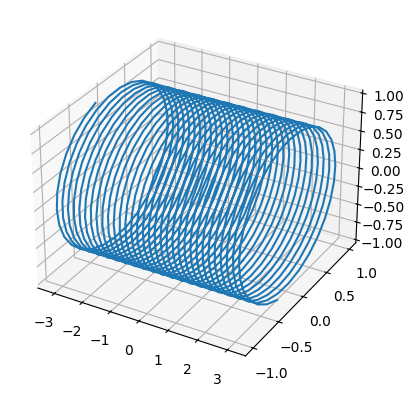

In [87]:
import math
#Sine Wave
def e_with_omega(t):
    y = []
    z = []
    for ele in t:
        expt = ((1.0/(np.sqrt(2*np.pi)*(omega_0-ele)))*np.exp(omega_0-ele) - 1)**2
        y.append(expt.real)
        z.append(expt.imag)
    return y, z
def e_to_t(t):
    y = []
    z = []
    for ele in t:
        e = np.exp(omega_0*ele*1j)
        y.append(e.real)
        z.append(e.imag)
    return y, z

t = np.linspace(-np.pi, np.pi, 900)

#Delta function with 0 argument
ft = plt.figure()
ax = plt.axes(projection='3d')
y, z = e_to_t(t)
ax.plot3D(t, y, z)



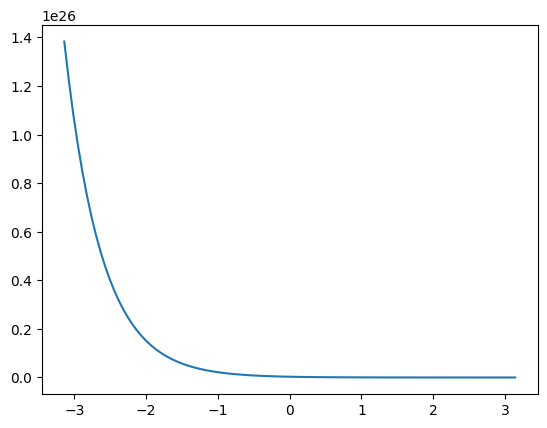

In [85]:
plt.figure()
y, z = e_with_omega(t)
(t,y,z)

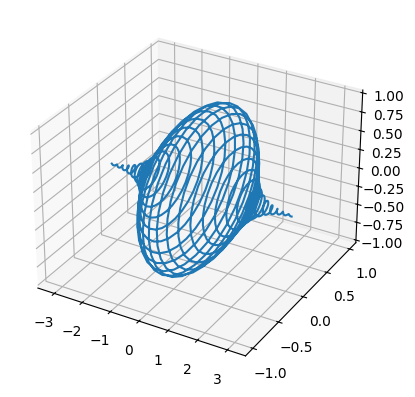

In [89]:
#Gaussian
def e_with_omega(t):
    y = []
    for ele in t:
        expt = ((1.0/(np.sqrt(2*np.pi)*(omega_0-ele)))*np.exp(omega_0-ele) - 1)**2
        y.append(expt)
    return y

t = np.linspace(-np.pi, np.pi, 900)

#Delta function with 0 argument
fig = plt.figure()
ax = plt.axes(projection='3d')
y = np.exp(-1*(t**2)/(2*sigma_t**2))*np.exp(1j*omega_0*t)
#How to graph i?
ax.plot3D(t, y.real, y.imag)



In [83]:
#How to take integral

This relates to the Hiesenberg principle 

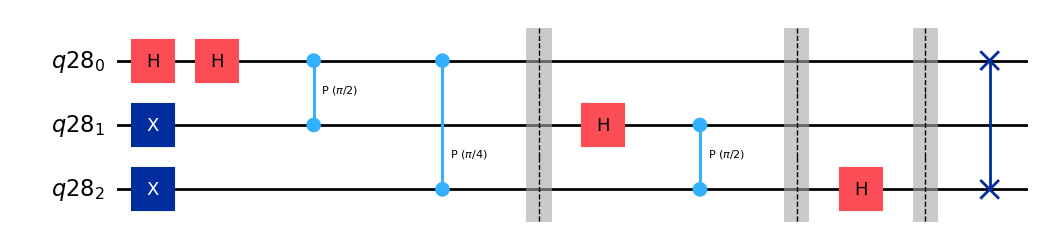

In [97]:
#Question 3
q = QuantumRegister(3)
qc = QuantumCircuit(q)

#To put in correct starting state
qc.h(0)
qc.x(1)
qc.x(2)

#QFT
qc.h(0)
qc.cp(pi/2,1,0)
qc.cp(pi/4,2,0)
qc.barrier()

qc.h(1)
qc.cp(pi/2,2,1)
qc.barrier()

qc.h(2)
qc.barrier()

qc.swap(0, 2)
qc.draw(output='mpl')



Statevector([ 5.000000e-01+0.j , -5.000000e-01+0.j , -3.061617e-17-0.5j,
              3.061617e-17+0.5j,  0.000000e+00+0.j ,  0.000000e+00+0.j ,
              0.000000e+00+0.j ,  0.000000e+00+0.j ],
            dims=(2, 2, 2))


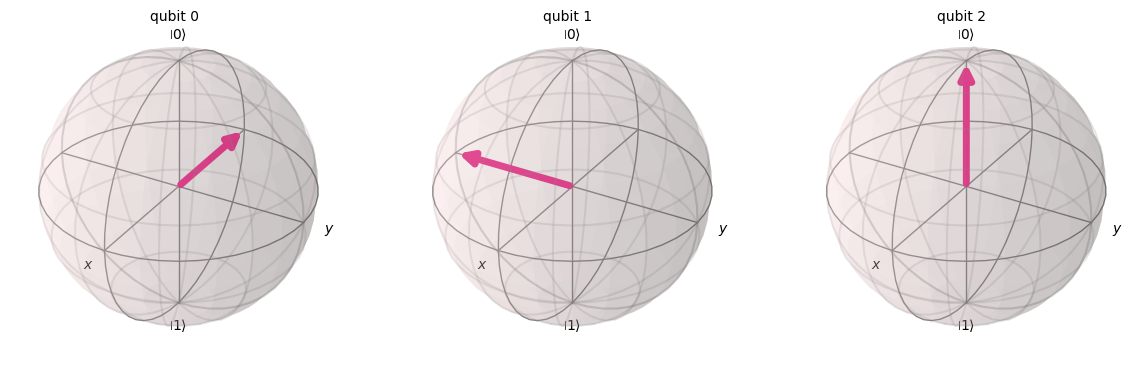

In [98]:
#Check state
statevector = Statevector(qc)
print(statevector)
plot_bloch_multivector(statevector)

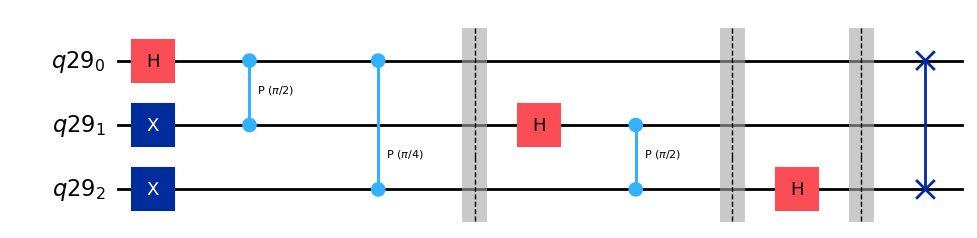

In [99]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

#To put in correct starting state
qc.x(1)
qc.x(2)

#QFT
qc.h(0)
qc.cp(pi/2,1,0)
qc.cp(pi/4,2,0)
qc.barrier()

qc.h(1)
qc.cp(pi/2,2,1)
qc.barrier()

qc.h(2)
qc.barrier()

qc.swap(0, 2)
qc.draw(output='mpl')

Statevector([ 3.53553391e-01+0.j        , -3.53553391e-01+0.j        ,
             -2.16489014e-17-0.35355339j,  2.16489014e-17+0.35355339j,
             -2.50000000e-01+0.25j      ,  2.50000000e-01-0.25j      ,
              2.50000000e-01+0.25j      , -2.50000000e-01-0.25j      ],
            dims=(2, 2, 2))


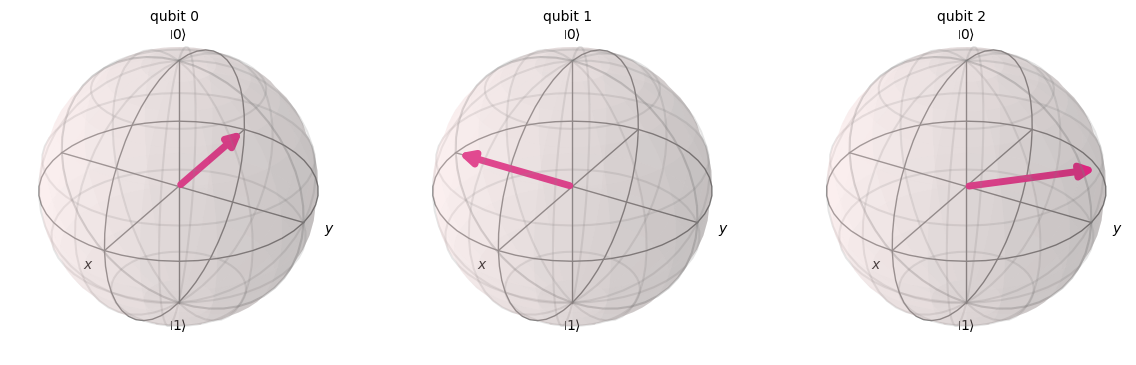

In [100]:
#Check state
statevector = Statevector(qc)
print(statevector)
plot_bloch_multivector(statevector)

In [ ]:
#Problem 5